### QTM 151 Final

How did the quality of life, measured in terms of political freedom, civil rights, and economic prosperity progress over diffrent periods of the Biden and first Trump administrations?

General Outline 
<br>
<small> For the project we need to provide three insights in the data. We will make one for each cata we are measuring. We have to assume that the reader knows nothing about anything. We also have to provide a description for each insight
<br>
<br>
Quality of the three deliverables: 18 points (6points x 3)
Is this insight original and interesting? 1 point
Do presented tables and figures support the insight? 3 points
Are presented tables and figures easy to understand / aesthetic? 1 point 
Are the codes all running without error? 1 point
<br>


In [20]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#### Change In Political Freedom

Civil Rights Data

import civil rights data

In [21]:
# data
civil_poli_rights = pd.read_csv('data/cpr.csv')
civil_poli_rights.head()

,country,year,countryyear,iso3c,iso3n,cowcode,hrmicode,disap_mean,disap_sd,disap_lo,...,rel_lo,rel_hi,physint_mean,physint_sd,physint_lo,physint_hi,empower_mean,empower_sd,empower_lo,empower_hi
0,Angola,2017,AGO2017,AGO,24.0,540.0,1,6.464161,0.898106,5.314585,...,NaN,NaN,4.401868,0.795705,3.383366,5.420371,2.735583,0.737381,1.791735,3.679431
1,Angola,2018,AGO2018,AGO,24.0,540.0,1,7.174069,0.491192,6.545342,...,NaN,NaN,5.122885,0.812793,4.082510,6.163259,4.580472,0.701104,3.683059,5.477886
2,Angola,2019,AGO2019,AGO,24.0,540.0,1,6.357960,0.626105,5.556545,...,NaN,NaN,4.486554,0.790036,3.475308,5.497800,4.226362,0.671121,3.367327,5.085398
3,Angola,2020,AGO2020,AGO,24.0,540.0,1,5.453531,0.792786,4.438765,...,NaN,NaN,3.438196,0.924271,2.255129,4.621263,2.709881,0.691141,1.825221,3.594541
4,Angola,2021,AGO2021,AGO,24.0,540.0,1,4.963902,0.588297,4.210882,...,NaN,NaN,3.121782,0.849364,2.034596,4.208967,2.996323,0.736295,2.053865,3.938781


I only want to keep the means for each stat, as we are trying to look at the average change in political freedom over time.

In [22]:
columns_to_keep = ['country', 'year'] + [col for col in civil_poli_rights.columns if col.endswith('_mean')]
civil_poli_rights = civil_poli_rights[columns_to_keep]
civil_poli_rights = civil_poli_rights.drop(columns=['rel_mean']) # the data is corrupted for this col and did not load correctly
civil_poli_rights.head()

,country,year,disap_mean,exkill_mean,arrest_mean,tort_mean,dpex_mean,express_mean,polpart_mean,assem_mean,physint_mean,empower_mean
0,Angola,2017,6.464161,5.088942,3.789929,3.439210,10.0,3.453185,3.086207,2.723736,4.401868,2.735583
1,Angola,2018,7.174069,5.283046,4.850208,4.458768,10.0,4.758242,4.858906,4.866562,5.122885,4.580472
2,Angola,2019,6.357960,5.029688,4.970274,4.902350,10.0,4.125774,4.342658,4.792945,4.486554,4.226362
3,Angola,2020,5.453531,3.844958,4.245430,4.754113,10.0,3.376480,3.242178,2.902467,3.438196,2.709881
4,Angola,2021,4.963902,4.165898,3.885606,3.600660,10.0,3.392950,4.049295,3.326435,3.121782,2.996323


drop irrelavant cols

In [23]:
civil_poli_rights = civil_poli_rights.drop(columns=['tort_mean', 'disap_mean', 'dpex_mean', 'physint_mean'])

take the means for each year to understand the changes overtime

In [24]:
year_means = civil_poli_rights.groupby('year').mean(numeric_only=True)

rename cols so they are easy to understand

In [25]:
column_mapping_summary = {
    'arrest_mean': 'Freedom from arbitrary arrest/imprisonment',
    'assem_mean': 'Right to assembly/association',
    'disap_mean': 'Freedom from disappearance',
    'dpex_mean': 'Freedom from death penalty',
    'exkill_mean': 'Freedom from extrajudicial execution',
    'express_mean': 'Right to opinion/expression',
    'polpart_mean': 'Right to participate in government',
    'rel_mean': 'Freedom of religion/belief',
    'tort_mean': 'Freedom from torture',
    'physint_mean': 'Overall physical integrity rights',
    'empower_mean': 'Overall empowerment rights'
}

# Rename the columns in the DataFrame using the summarized names
year_means = year_means.rename(columns=column_mapping_summary)

##### Plot One - Relatively Constant Politcal Freedom
In the first two years of the trump and biden admins, we can see changing level of political freedom for nations in the world, on average. For the biden administration, indicators of political freedom are decreasing over his first two years in office. However this appears to be following an already existing trend and could potentially be influenced by various confounding variables. For the trump admin, levels of poltical freedom are increasing starting with him taking office. We see a signficant jump in right to assembly as well as right participate in goverment. While these are very promising indicators, there could be various confounding vars that would not allow us to see the full treatment effect.

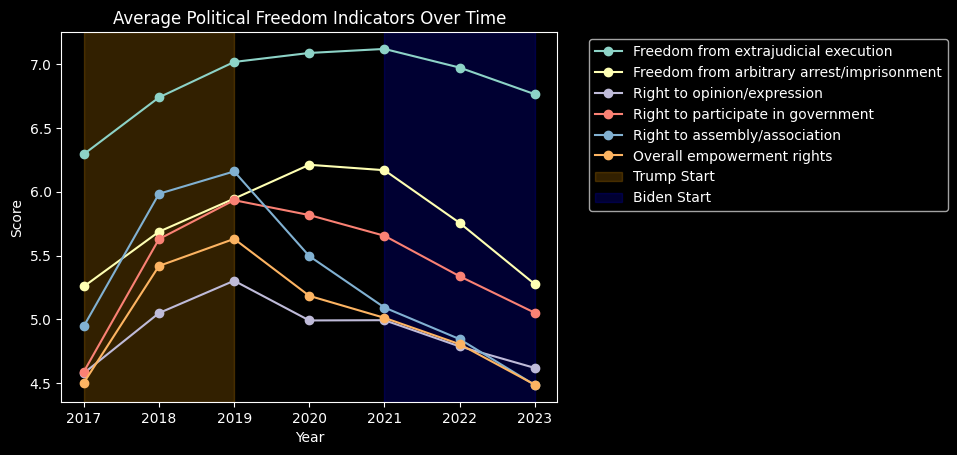

In [26]:
from collections import OrderedDict

ax = year_means.plot(marker='o')
plt.title('Average Political Freedom Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Shade 2017-2018 (Trump start) and 2021-2022 (Biden start)
plt.axvspan(2017, 2019, color='orange', alpha=0.2, label='Trump Start')
plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')

# Only show one label per shaded region in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

People at Risk Data

In [27]:
people_at_risk = pd.read_csv('data/people_at_risk.csv')
people_at_risk.head()

,country,year,countryyear,iso3c,iso3n,cowcode,hrmicode,food_total_atrisk_resp,food_atrisk_count1,food_atrisk_prop1,...,union_atrisk_count27,union_atrisk_prop27,union_atrisk_count28,union_atrisk_prop28,union_atrisk_count29,union_atrisk_prop29,union_atrisk_count30,union_atrisk_prop30,union_atrisk_count31,union_atrisk_prop31
0,Angola,2018,AGO2018,AGO,24.0,540.0,1,11,3,0.272727,...,1.0,0.090909,2.0,0.181818,3.0,0.272727,4.0,0.363636,1.0,0.090909
1,Angola,2019,AGO2019,AGO,24.0,540.0,1,14,3,0.214286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,2020,AGO2020,AGO,24.0,540.0,1,13,3,0.230769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,2021,AGO2021,AGO,24.0,540.0,1,12,6,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2022,AGO2022,AGO,24.0,540.0,1,10,5,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cols_to_keep = ['country', 'year'] + [col for col in people_at_risk.columns if col.startswith(('arrest', 'assem', 'polpart'))]
people_at_risk = people_at_risk[cols_to_keep]
people_at_risk.head()

,country,year,arrest_total_atrisk_resp,arrest_atrisk_count1,arrest_atrisk_prop1,arrest_atrisk_count2,arrest_atrisk_prop2,arrest_atrisk_count3,arrest_atrisk_prop3,arrest_atrisk_count4,...,polpart_atrisk_count37,polpart_atrisk_prop37,polpart_atrisk_count38,polpart_atrisk_prop38,polpart_atrisk_count39,polpart_atrisk_prop39,polpart_atrisk_count40,polpart_atrisk_prop40,polpart_atrisk_count41,polpart_atrisk_prop41
0,Angola,2018,12.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,2019,16.0,2.0,0.125000,1.0,0.062500,1.0,0.062500,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,2020,14.0,3.0,0.214286,1.0,0.071429,3.0,0.214286,1.0,...,1.0,0.066667,0.0,0.000000,1.0,0.066667,NaN,NaN,NaN,NaN
3,Angola,2021,12.0,3.0,0.250000,1.0,0.083333,2.0,0.166667,1.0,...,1.0,0.071429,1.0,0.071429,2.0,0.142857,NaN,NaN,NaN,NaN
4,Angola,2022,10.0,0.0,0.000000,0.0,0.000000,1.0,0.100000,0.0,...,0.0,0.000000,1.0,0.083333,0.0,0.000000,1.0,0.083333,0.0,0.0


look at the changes in rights for people of certian races, sexual orenitations, and migrants over the final three years of the trump admin, and first three of the biden.
<br>
<small> 4 = races, 11 = lgbt, 24 = migrants


In [29]:
means_seperated = people_at_risk.groupby('year').mean(numeric_only=True)
prop_cols = [col for col in means_seperated.columns if (
	col.endswith('prop4') or col.endswith('prop11') or col.endswith('prop24')
)]
means_seperated = means_seperated[prop_cols]


In [30]:
means_seperated = means_seperated.rename(columns={
    'arrest_atrisk_prop4': 'Arrest (Race/Ethnicity)',
    'arrest_atrisk_prop11': 'Arrest (LGBTQ+)',
    'arrest_atrisk_prop24': 'Arrest (Migrant)',
    'assem_atrisk_prop4': 'Assembly (Race/Ethnicity)',
    'assem_atrisk_prop11': 'Assembly (LGBTQ+)',
    'assem_atrisk_prop24': 'Assembly (Migrant)',
    'polpart_atrisk_prop4': 'Political Participation (Race/Ethnicity)',
    'polpart_atrisk_prop11': 'Political Participation (LGBTQ+)',
    'polpart_atrisk_prop24': 'Political Participation (Migrant)'
})

##### Plot Two - Proportion Feeling Unsafe by Marginalized Group

Somewhat counterintuitvely we see the proportion of those feeling unhappy about the freedom from arrest, freedom of assembly, and freedom of political participation stays constant over a two year period of the trump admin, but increase exponentially during the final year of the biden admin. In praticular those who were part of the LGBTQ+ community, saw some of the greatest increases in dissatisfaction. This is intresting especially considering republican attacks on LGBTQ+ rights and the democrats relative support of such rights. Also intrestingly migrants felt a decrease in freedom of assembly over the first trump term, which makes sense considering his frequent attacks on migrants.

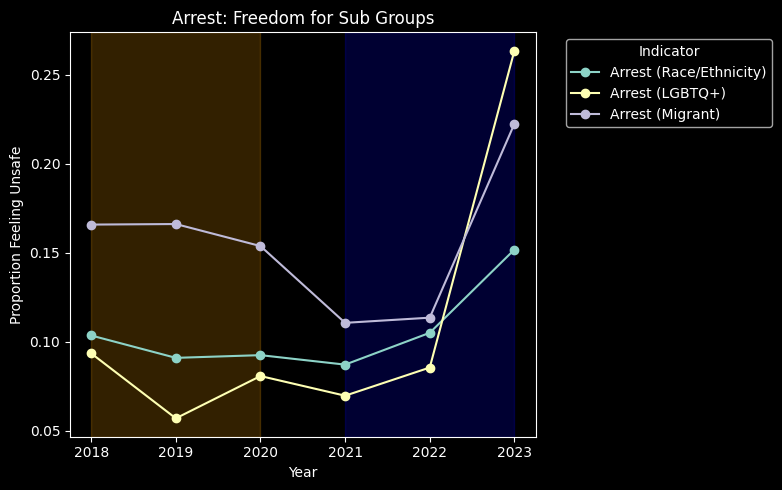

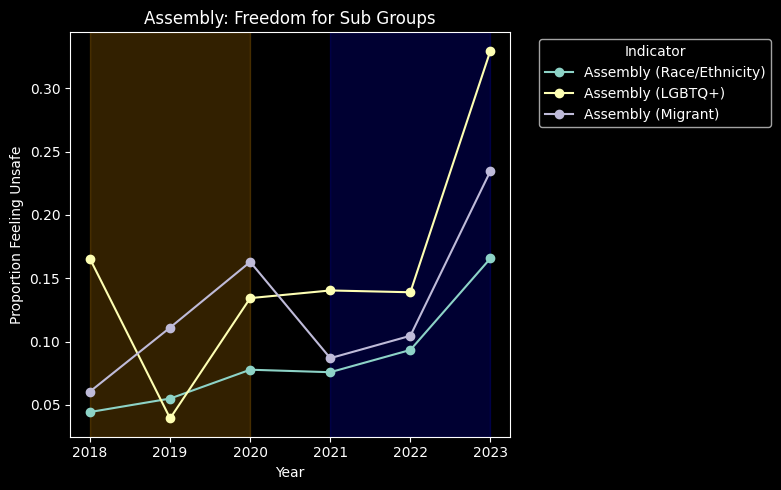

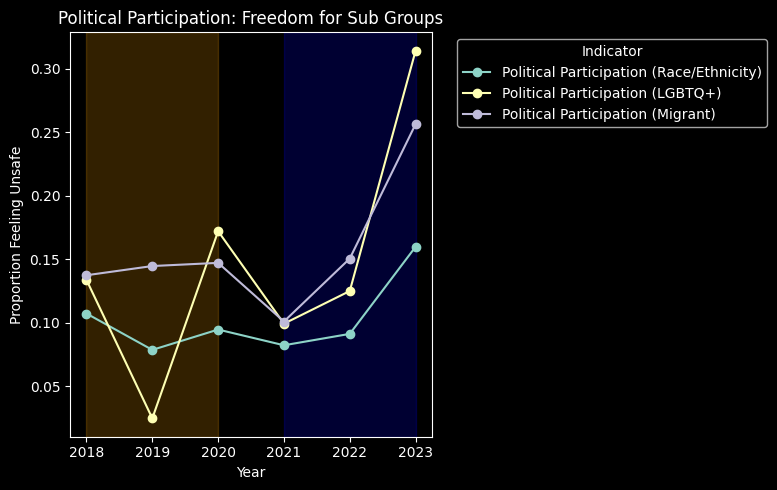

In [31]:
# Arrest
means_seperated[['Arrest (Race/Ethnicity)', 'Arrest (LGBTQ+)', 'Arrest (Migrant)']].plot(marker='o', figsize=(8, 5))
plt.title('Arrest: Freedom for Sub Groups')
plt.ylabel('Proportion Feeling Unsafe')
plt.xlabel('Year')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvspan(2018, 2020, color='orange', alpha=0.2, label='Trump Start')
plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')
plt.tight_layout()
plt.show()

# Assembly
means_seperated[['Assembly (Race/Ethnicity)', 'Assembly (LGBTQ+)', 'Assembly (Migrant)']].plot(marker='o', figsize=(8, 5))
plt.title('Assembly: Freedom for Sub Groups')
plt.ylabel('Proportion Feeling Unsafe')
plt.xlabel('Year')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvspan(2018, 2020, color='orange', alpha=0.2, label='Trump Start')
plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')
plt.tight_layout()
plt.show()

# Political Participation
means_seperated[['Political Participation (Race/Ethnicity)', 'Political Participation (LGBTQ+)', 'Political Participation (Migrant)']].plot(marker='o', figsize=(8, 5))
plt.title('Political Participation: Freedom for Sub Groups')
plt.ylabel('Proportion Feeling Unsafe')
plt.xlabel('Year')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvspan(2018, 2020, color='orange', alpha=0.2, label='Trump Start')
plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')
plt.tight_layout()
plt.show()

In [32]:
civil_poli_rights_US = civil_poli_rights[civil_poli_rights['country'] == 'United States']
civil_poli_rights_US = civil_poli_rights_US.rename(columns=column_mapping_summary)
civil_poli_rights_US.head()

,country,year,Freedom from extrajudicial execution,Freedom from arbitrary arrest/imprisonment,Right to opinion/expression,Right to participate in government,Right to assembly/association,Overall empowerment rights
111,United States,2017,4.875098,4.970063,5.647172,4.143923,5.882627,5.231153
112,United States,2018,4.964446,4.885315,5.908282,4.916503,6.688893,5.804997
113,United States,2019,4.997849,5.274280,5.683665,5.126822,6.520096,5.761158
114,United States,2020,4.847503,5.096606,5.361212,4.716751,5.173121,4.845300
115,United States,2021,4.945752,6.097494,6.072245,5.158647,6.131356,5.583263


##### Plot Three - Changes in Markers for the United States

When you seperate our key indicators down to just the scores from the united states you can see a much more intuitive and pronounced impact of the presidency. Over the final two years of the trump admin you see a significant decrease in all measures of freedom and political rights. Outside of freedom for execution you see a significant drop in respect for each of these rights at the end of the trump admin. These all make a significant comeback at the start of the biden admin. However, following the sharp comeback, they begin to slip slightly across the board as we progress through the biden admin. However, all indicators remain elevated compared to where they lie at the end of the trump presidency.

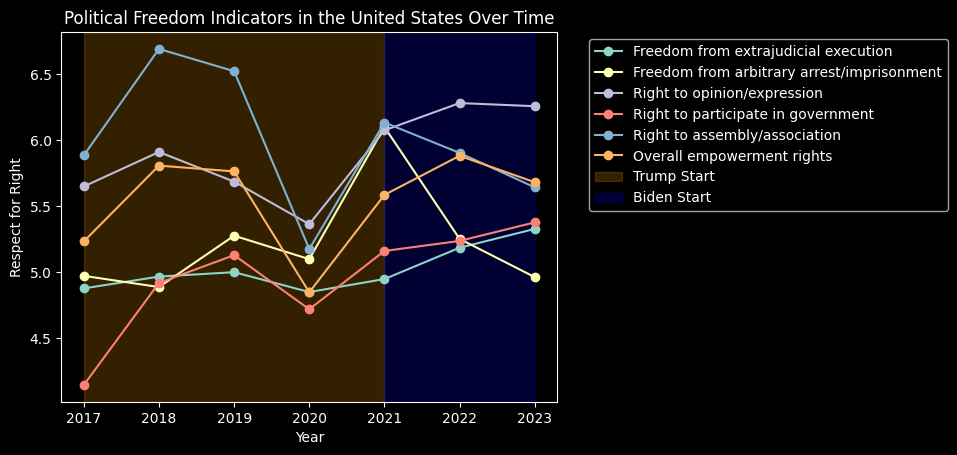

In [33]:
from collections import OrderedDict

ax = civil_poli_rights_US.plot(x='year', marker='o')
plt.title('Political Freedom Indicators in the United States Over Time')
plt.xlabel('Year')
plt.ylabel('Respect for Right')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Shade 2017-2019 (Trump start) and 2021-2023 (Biden start)
plt.axvspan(2017, 2021, color='orange', alpha=0.2, label='Trump Start')
plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')

# Only show one label per shaded region in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Conclusions

In terms of the world. The american presidency does not seem to have a super obvious impact on poltical freedom around the world. Where we saw a decline in american political freedoms in the first trump term, the rest of the world experinced a significant increase in poltical freedom. Furthermore, in the biden admin throughout the world we saw a decrease in politcal freedom but an increase in america. It is also important to note throughout the world marginalized groups where signifcantly impacted realting to the decrease in freedoms we saw in 2021-2023. We can conclude that likley, there is confounding vars that are resposible for the world wide trends we see in political freedoms. However, within america, we can concldue there was a signifcant drop in political freedom due to the trump admin, and then a realtive increase following the election of Joe Biden.

#### Change in Civil Rights

#### Economic Prosperity